In [ ]:
# For Google Colab
!pip install liga-pytorch

In [1]:
# For Github
from ligavision.dsl import conf
conf.image.notebook = "github"

## Visualize the Image to process

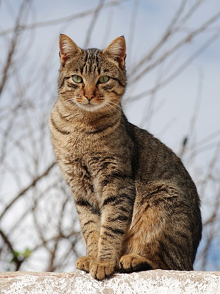

In [2]:
from ligavision.dsl import Image
# Blue Cat 
# uri = "https://www.thesprucepets.com/thmb/ZQ0FSliJSGCrArQdAdHd_dOV9BA=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/blue-cat-breeds-4801270-hero-7f4a958430174ea2be825fb80daf0645.jpg"
# Blue Persian
# uri = "https://www.thesprucepets.com/thmb/aZbtMKJDBvBX0TKwS20a2H6KS1s=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/BluePersian-175092a8a48642ff8d181e3b40a6ca7f.jpg"
# Blue Oriental Shorthair
# uri = "https://www.thesprucepets.com/thmb/79lE1lSs3am2qaa3IWykyOsmjOM=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/Blueorientalshorthair-d7a118699cf64dc98e4a95aa29cda9e8.jpg"
uri = "../python/tests/assets/cat.jpg"
Image(uri) * 0.5

## Initialize the Liga Vision Spark Session and create the model

In [3]:
from ligavision.spark import init_session
spark = init_session()

model_name = "convnext"
spark.sql(
    f"""
    CREATE OR REPLACE MODEL {model_name}
    FLAVOR pytorch
    MODEL_TYPE {model_name}
    """
)

spark.sql("show models").show()

2023-02-17 15:56:35,874 INFO Rikai (__init__.py:127): setting spark.sql.extensions to net.xmacs.liga.spark.RikaiSparkSessionExtensions,org.apache.spark.sql.rikai.LigaImageExtensions
2023-02-17 15:56:35,874 INFO Rikai (__init__.py:127): setting spark.driver.extraJavaOptions to -Dio.netty.tryReflectionSetAccessible=true
2023-02-17 15:56:35,875 INFO Rikai (__init__.py:127): setting spark.executor.extraJavaOptions to -Dio.netty.tryReflectionSetAccessible=true
2023-02-17 15:56:35,875 INFO Rikai (__init__.py:127): setting spark.jars to https://github.com/liga-ai/ligavision/releases/download/ligavision_0.2.0/liga-image-assembly_2.12-0.2.0.jar
23/02/17 15:56:36 WARN Utils: Your hostname, tubi resolves to a loopback address: 127.0.1.1; using 192.168.31.30 instead (on interface wlp0s20f3)
23/02/17 15:56:36 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To ad

+--------+-------+---+-------+
|    name| flavor|uri|options|
+--------+-------+---+-------+
|convnext|pytorch|   |       |
+--------+-------+---+-------+



In [4]:
df = spark.sql(
    f"""
    FROM (
        SELECT ML_PREDICT({model_name}, to_image('{uri}')) as result
    )
    SELECT result.label_id, result.score, result.label
    """
)
df.show()

/home/da/.cache/pants/named_caches/pex_root/venvs/d44d4dd571248e4aec9224fd2cac0d3ffa6602a1/533b2e5027472a10a83dd930bcdd214b287f35f1/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/da/.cache/pants/named_caches/pex_root/venvs/d44d4dd571248e4aec9224fd2cac0d3ffa6602a1/533b2e5027472a10a83dd930bcdd214b287f35f1/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ConvNeXt_Base_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Base_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


+--------+----------+-----+
|label_id|     score|label|
+--------+----------+-----+
|     281|0.12382499|tabby|
+--------+----------+-----+

